# Import and Setup

Import general packages and YLXPS-related packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
import os 
import scipy
import importlib
import datetime as dt
import matplotlib
import pandas as pd

plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../analysis/')
import HelperClasses as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [2]:
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../analysis\\PlotFunctions.py'>

# Data Read-In

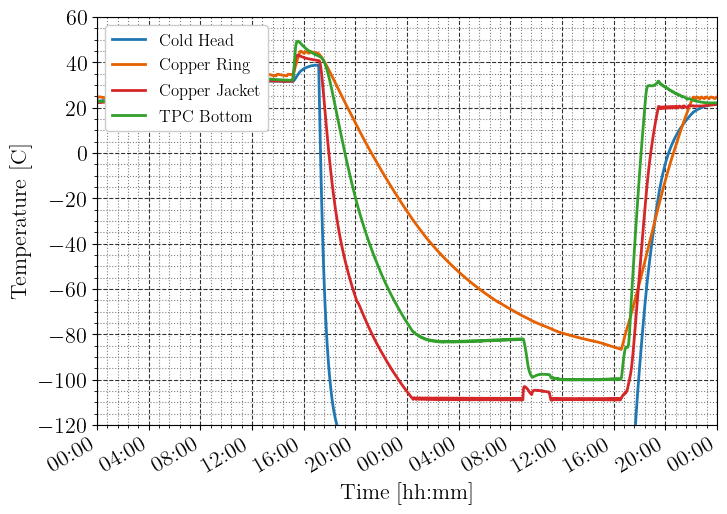

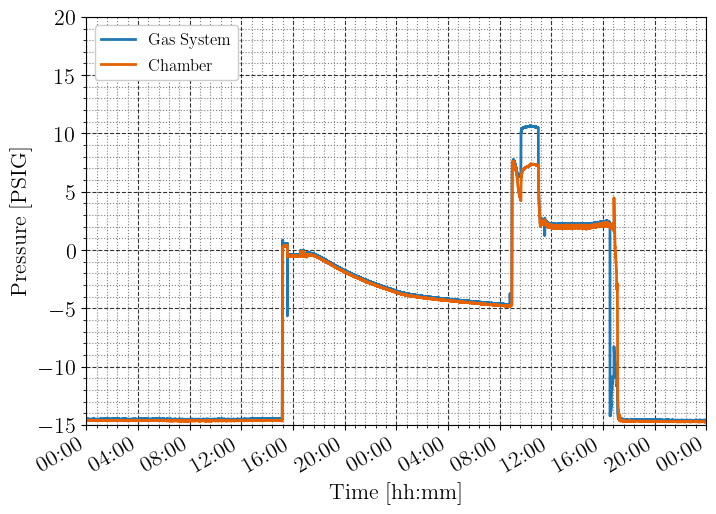

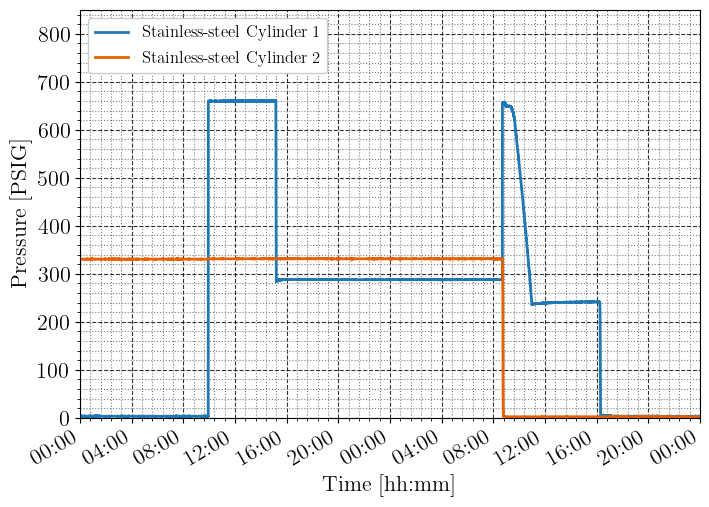

In [3]:
Sensors = []
Files = ['C:/Data/StandStatus/20210511.h5', 'C:/Data/StandStatus/20210512.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2021,5,11,0,0), dt.datetime(2021,5,13,0,0)]
 
AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=240, YTicks=20, XRange=XRange, YRange=[-120,60])
AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=240, YTicks=5, XRange=XRange, YRange=[-15,20])
AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=240, YTicks=100, XRange=XRange, YRange=[0,850])

 | Filename... C:/Data/20210512\Noise_C-200V_A-1200V_0.h5
 | Number of files in ch1...	 80/80
 | Number of files in ch2...	 80/80
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  11.421875 sec


(-100.0, 1000.0)

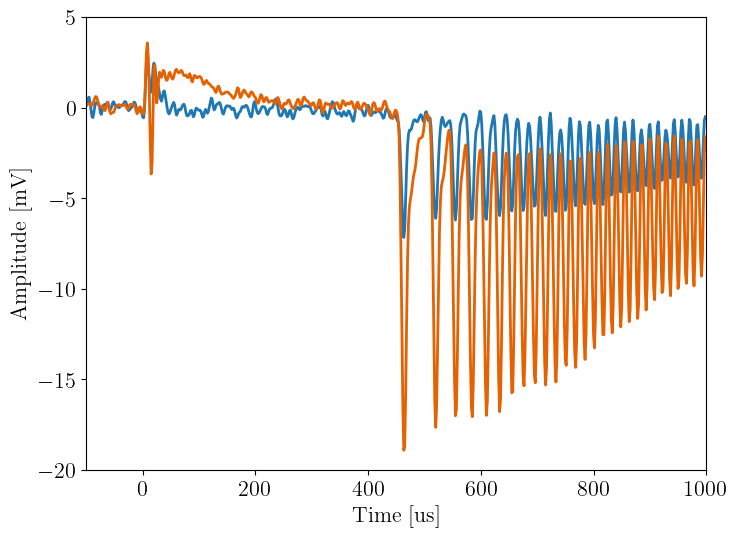

In [4]:
D0 = Dataset.Dataset(Path='C:/Data/20210512/', Selection='Noise*.h5')
D0.RunStandardAnalysis()

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D0.Ch[0].Time, np.mean(D0.Ch[0].Amp,axis=0))
plt.plot(D0.Ch[0].Time, np.mean(D0.Ch[1].Amp,axis=0)*-1)
plt.xlim(-100,1000)

 | Filename... C:/Data/20210512\Filling_C-200V_A-1200V_0.h5
 | Number of files in ch1...	 100/100
 | Number of files in ch2...	 100/100
 | Filename... C:/Data/20210512\Filling_C-200V_A-1200V_1.h5
 | Number of files in ch1...	 100/200
 | Number of files in ch2...	 100/200
 | Filename... C:/Data/20210512\Filling_C-200V_A-1200V_2.h5
 | Number of files in ch1...	 95/295
 | Number of files in ch2...	 95/295
 | Filename... C:/Data/20210512\Filling_C-200V_A-1200V_2_0.h5
 | Number of files in ch1...	 100/395
 | Number of files in ch2...	 100/395
 | Filename... C:/Data/20210512\Filling_C-200V_A-1200V_2_1.h5
 | Number of files in ch1...	 100/495
 | Number of files in ch2...	 100/495
 | Filename... C:/Data/20210512\Filling_C-200V_A-1200V_2_2.h5
 | Number of files in ch1...	 100/595
 | Number of files in ch2...	 100/595
 | Filename... C:/Data/20210512\Filling_C-200V_A-1200V_2_3.h5
 | Number of files in ch1...	 100/695
 | Number of files in ch2...	 100/695
 | Filename... C:/Data/20210512\Filling_C-

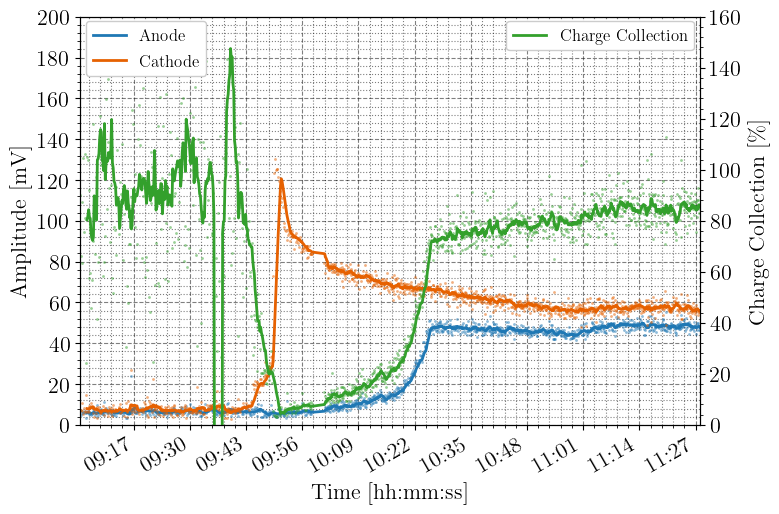

In [5]:
D1 = Dataset.Dataset(Path='C:/Data/20210512/', Selection='Filling*.h5')
D1.RunStandardAnalysis(NoiseDataset=D0)
D1.ShowAmplitudeVsTime(YTicks=20, YMax=200)
plt.savefig('20210512_cc.png')
# D1.ShowDrifttimeVsTime()


# plt.figure()
# plt.xlabel('Time [us]')
# plt.ylabel('Amplitude [mV]')
# plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[0].Amp[-10:],axis=0))
# plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[1].Amp[-10:],axis=0)*-1)
# plt.xlim(-100,150)

 | Filename... C:/Data/20210512\Purify_C-100V_A-600V_0.h5
 | Number of files in ch1...	 95/95
 | Number of files in ch2...	 95/95
 | Filename... C:/Data/20210512\Purify_C-130V_A-800V_0.h5
 | Number of files in ch1...	 68/163
 | Number of files in ch2...	 68/163
 | Filename... C:/Data/20210512\Purify_C-160V_A-1000V_0.h5
 | Number of files in ch1...	 46/209
 | Number of files in ch2...	 46/209
 | Filename... C:/Data/20210512\Purify_C-200V_A-1200V_0.h5
 | Number of files in ch1...	 100/309
 | Number of files in ch2...	 100/309
 | Filename... C:/Data/20210512\Purify_C-200V_A-1200V_1.h5
 | Number of files in ch1...	 26/335
 | Number of files in ch2...	 26/335
 | Filename... C:/Data/20210512\Purify_C-200V_A-1200V_1_0.h5
 | Number of files in ch1...	 100/435
 | Number of files in ch2...	 100/435
 | Filename... C:/Data/20210512\Purify_C-200V_A-1200V_1_1.h5
 | Number of files in ch1...	 17/452
 | Number of files in ch2...	 17/452
 | Filename... C:/Data/20210512\Purify_C-200V_A-1200V_2_0.h5
 | N

(-100.0, 1000.0)

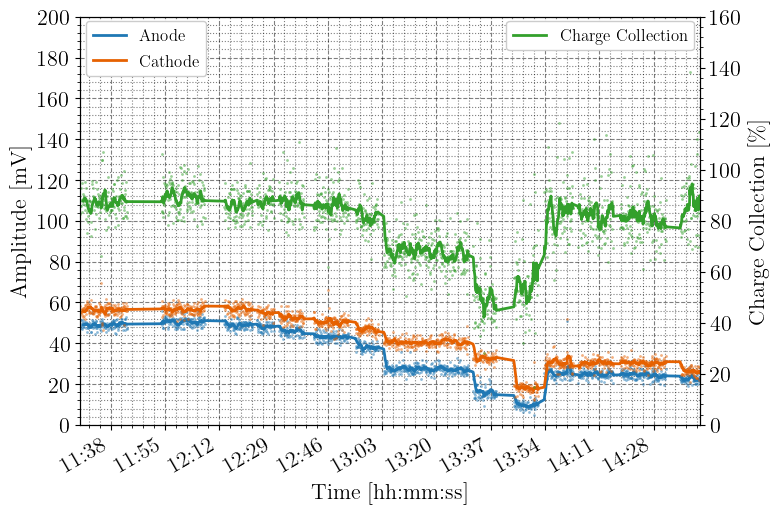

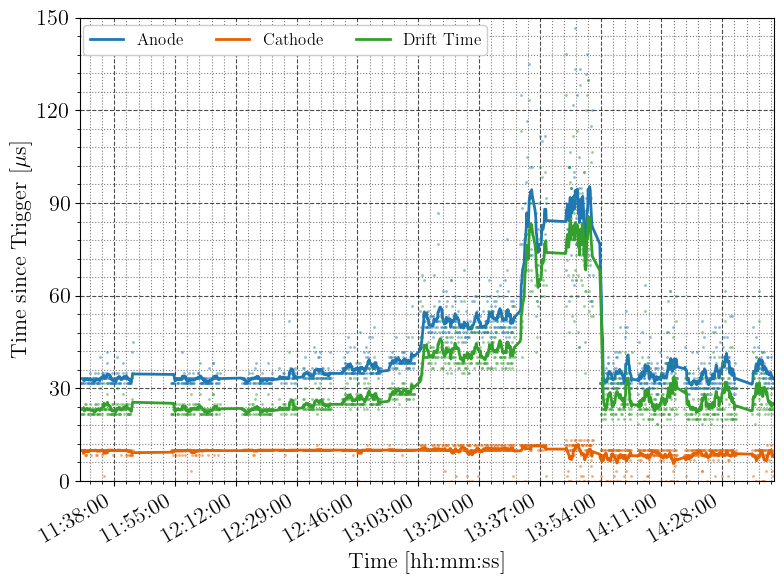

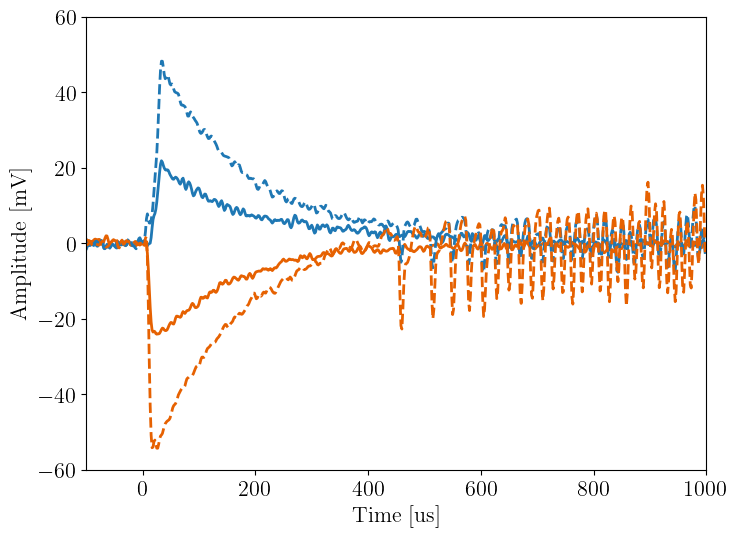

In [6]:
D2 = Dataset.Dataset(Path='C:/Data/20210512/', Selection='Purify*')
D2.RunStandardAnalysis()
D2.ShowAmplitudeVsTime(YTicks=20, YMax=200)
D2.ShowDrifttimeVsTime()
print(np.mean(D2.DriftTime))
print(np.mean(D2.ChargeCollection[-10:]), np.median(D2.ChargeCollection[-10:]))

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[0].Amp[-10:],axis=0))
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[1].Amp[-10:],axis=0)*-1)

plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[0].Amp[:10],axis=0), color=colors[0], ls='--')
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[1].Amp[:10],axis=0)*-1, color=colors[1], ls='--')
plt.xlim(-100,1000)

 | Filename... C:/Data/20210512\Purify_C-20V_A-100V_0.h5
 | Number of files in ch1...	 64/64
 | Number of files in ch2...	 64/64
 | Filename... C:/Data/20210512\Purify_C-20V_A-100V_1_0.h5
 | Number of files in ch1...	 66/130
 | Number of files in ch2...	 66/130
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  20.734375 sec
 | Filename... C:/Data/20210512\Purify_C-40V_A-200V_0.h5
 | Number of files in ch1...	 100/100
 | Number of files in ch2...	 100/100
 | Filename... C:/Data/20210512\Purify_C-40V_A-200V_1.h5
 | Number of files in ch1...	 100/200
 | Number of files in ch2...	 100/200
 | Filename... C:/Data/20210512\Purify_C-40V_A-200V_2.h5
 | Number of files in ch1...	 28/228
 | Number of files in ch2...	 28/228
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  21.0625 sec
 | Filename... C:/Data/20210512\Purify_C-70V_A-400V_0.h5
 | Number of files in ch1...	 63/63
 | Number of files in ch2...	 63/63
 | Process

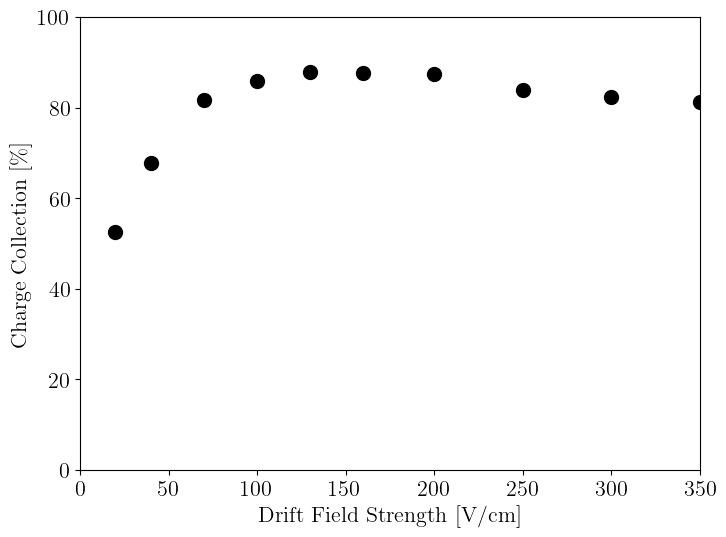

In [7]:
field = [20,40,70,100,130,160,200,250,300,350]
plt.figure()
for fl in field: 
    D3 = Dataset.Dataset(Path='C:/Data/20210512/', Selection='*Purify_C-{}V*.h5'.format(fl))
    D3.RunStandardAnalysis()
    plt.scatter(fl, np.mean(D3.ChargeCollection)*100.0, color='k')
plt.xlabel('Drift Field Strength [V/cm]')
plt.ylabel('Charge Collection [\%]')
plt.ylim(0,100)
plt.savefig('lifetime_vs_cc.png')
plt.show()

 | Filename... C:/Data/20210512\Purify_C-200V_A-1200V_2_0.h5
 | Number of files in ch1...	 54/54
 | Number of files in ch2...	 54/54
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  24.546875 sec


0.8650647414352847

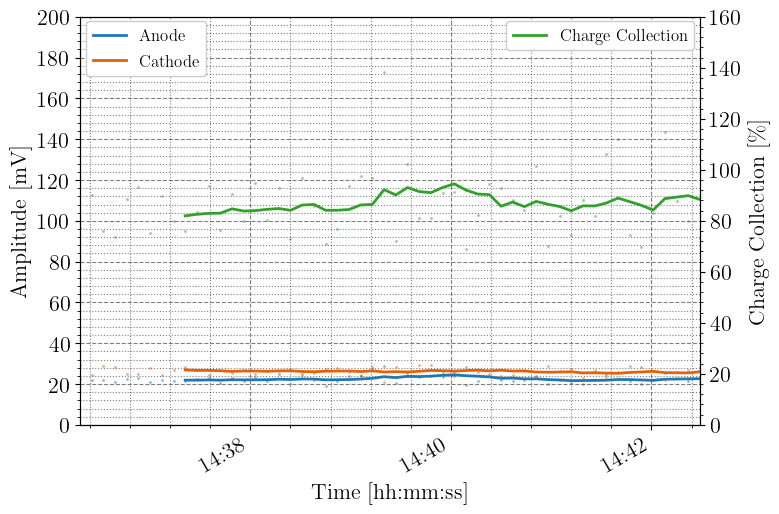

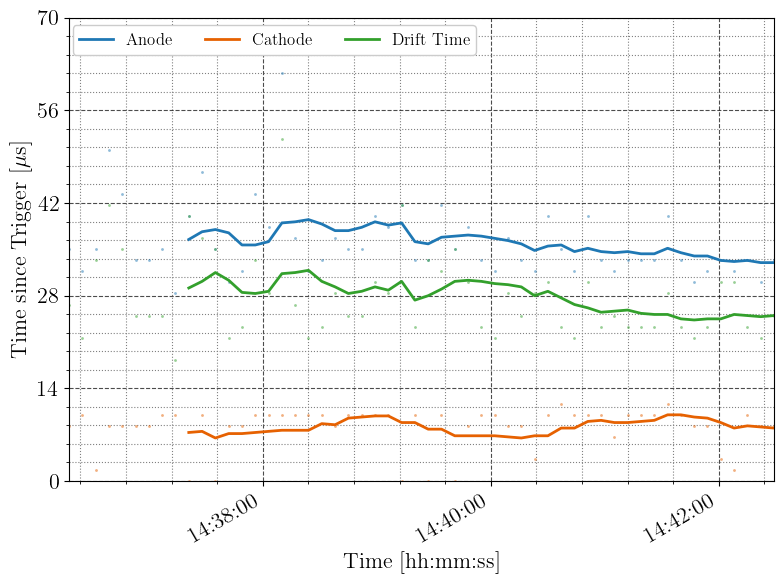

In [8]:
D4 = Dataset.Dataset(Path='C:/Data/20210512/', Selection='Purify_C-200V*_2_*')
D4.RunStandardAnalysis()
D4.ShowAmplitudeVsTime(YTicks=20, YMax=200)
D4.ShowDrifttimeVsTime()
np.mean(D4.ChargeCollection)

 | Filename... C:/Data/20210512\StopPurify_C-200V_A-1200V_0.h5
 | Number of files in ch1...	 100/100
 | Number of files in ch2...	 100/100
 | Filename... C:/Data/20210512\StopPurify_C-200V_A-1200V_1.h5
 | Number of files in ch1...	 100/200
 | Number of files in ch2...	 100/200
 | Filename... C:/Data/20210512\StopPurify_C-200V_A-1200V_2.h5
 | Number of files in ch1...	 100/300
 | Number of files in ch2...	 100/300
 | Filename... C:/Data/20210512\StopPurify_C-200V_A-1200V_3.h5
 | Number of files in ch1...	 100/400
 | Number of files in ch2...	 100/400
 | Filename... C:/Data/20210512\StopPurify_C-200V_A-1200V_4.h5
 | Number of files in ch1...	 100/500
 | Number of files in ch2...	 100/500
 | Filename... C:/Data/20210512\StopPurify_C-200V_A-1200V_5.h5
 | Number of files in ch1...	 100/600
 | Number of files in ch2...	 100/600
 | Filename... C:/Data/20210512\StopPurify_C-200V_A-1200V_6.h5
 | Number of files in ch1...	 100/700
 | Number of files in ch2...	 100/700
 | Filename... C:/Data/2021

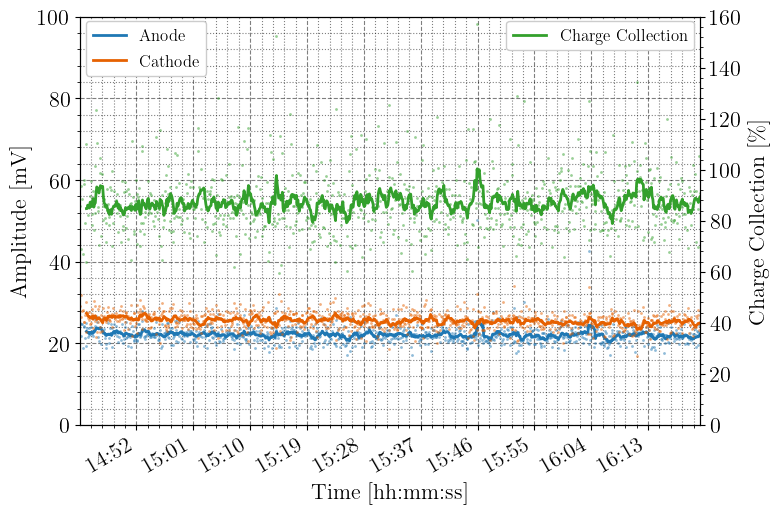

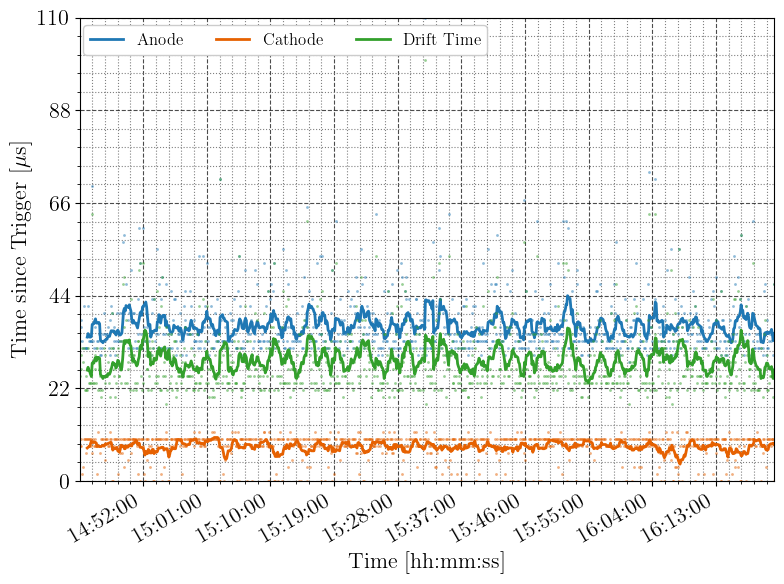

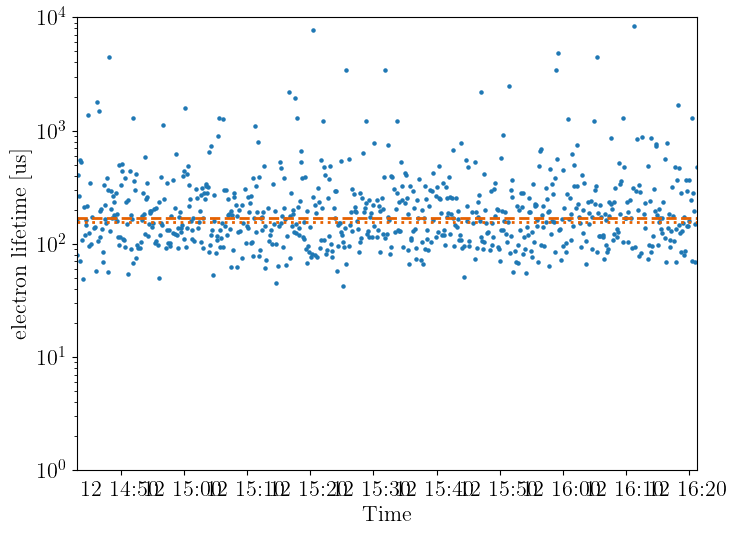

In [9]:
D5 = Dataset.Dataset(Path='C:/Data/20210512/', Selection='Stop*')
D5.RunStandardAnalysis()
D5.ShowAmplitudeVsTime(YTicks=20, YMax=100)
D5.ShowDrifttimeVsTime()

drift = D5.DriftTime
cc = D5.Ch[0].Max/D5.Ch[1].Max
lifetime =  -drift/np.log(cc)

cut = np.where((lifetime>0) & (lifetime<10000))
print(np.mean(drift[-10:]), np.mean(cc[-10:]), np.mean(lifetime[cut][-10:]))
print(np.mean(drift), np.mean(cc), np.mean(lifetime[cut]))


plt.figure()
plt.scatter(D5.Ch[0].TimeStamp, lifetime, s=5)
plt.hlines(y=np.median(lifetime[cut]), xmin=D5.Ch[0].TimeStamp[0], xmax=D5.Ch[0].TimeStamp[-1], color=colors[1], ls='--' )
plt.hlines(y=np.median(lifetime[cut][-30:]), xmin=D5.Ch[0].TimeStamp[0], xmax=D5.Ch[0].TimeStamp[-1], color=colors[1], ls=':' )

plt.xlabel('Time')
plt.ylabel('electron lifetime [us]')
plt.ylim(1,10000)
plt.yscale('log')
plt.savefig('20210512_lifetime.png')
plt.show()

In [10]:
delta = dt.datetime(2021,5,12,0,0) - dt.datetime(2021,5,10,0,0)
capdata_last = pd.read_csv("C:/Data/LevelMeter/20210510_liquefaction_9.csv", names=['Time', 'Level'])
timestamp_last = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") + delta for x in capdata_last['Time']])
cap_last = np.array(capdata_last['Level'])

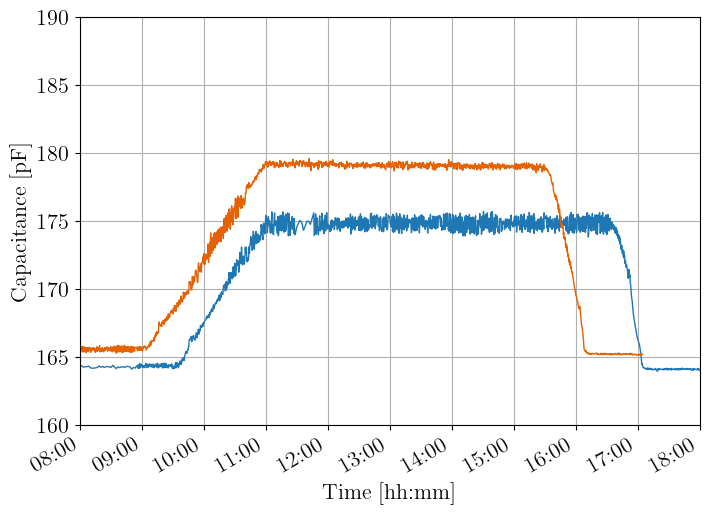

In [11]:
capdata = pd.read_csv("C:/Data/LevelMeter/20210512_liquefaction_10.csv", names=['Time', 'Level'])
timestamp = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") for x in capdata['Time']])
cap = np.array(capdata['Level'])
formatter = matplotlib.dates.DateFormatter('%H:%M')

fig = plt.figure()
ax = fig.gca()

XRange = [dt.datetime(2021,5,12,8,0), dt.datetime(2021,5,12,18,0)]

plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.grid()
plt.xlabel('Time [hh:mm]')
plt.ylabel('Capacitance [pF]')

plt.xlim(XRange[0], XRange[1])
ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=60))

cut = np.where((timestamp>XRange[0]) & (cap>0))
plt.plot(timestamp[cut][::10], cap[cut][::10], lw=1)

cut_last = np.where((timestamp_last>XRange[0]) & (cap_last>0))
plt.errorbar(timestamp_last[cut_last][::10], cap_last[cut_last][::10], lw=1)
             
plt.ylim(160,190)
plt.show() 